In [1]:
#Import Dependencies 
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt



# Reflect Tables into SQLAlchemy ORM

In [2]:
# Additional Dependencies (python SQL and ORM)
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [3]:
#Create Engine
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [4]:
# Renaming sqlalchemy import 
base = automap_base()

# reflect the tables
base.prepare(engine, reflect = True)

# See available keys
base.classes.keys()

['measurement', 'station']

In [5]:
# Assign variable to each key class 
measurement = base.classes.measurement

stations = base.classes.station

# Create our link to our database 
session = Session(engine)

# Exploratory Climate Analysis

In [6]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database

# Create query to find last date and convert to date format
last_date = session.query(func.max(measurement.date)).all()[0][0]
last_date = dt.datetime.strptime(last_date, '%Y-%m-%d')

last_date_year = int(dt.datetime.strftime(last_date, '%Y'))
last_date_month = int(dt.datetime.strftime(last_date, '%m'))
last_date_day = int(dt.datetime.strftime(last_date, '%d'))

# subtract 365 days from 'last_date'
last_date_minus365 = dt.date(last_date_year, last_date_month, last_date_day) - dt.timedelta(days=365)
print(last_date)
print(last_date_minus365)


2017-08-23 00:00:00
2016-08-23


In [7]:
# Perform a query to retrieve the data and precipitation scores
climate_data = session.query(measurement.date,measurement.prcp)\
.filter(measurement.date >= last_date_minus365).all()


In [8]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date

results_df = pd.DataFrame(climate_data).sort_values('date',ascending = True).set_index('date')


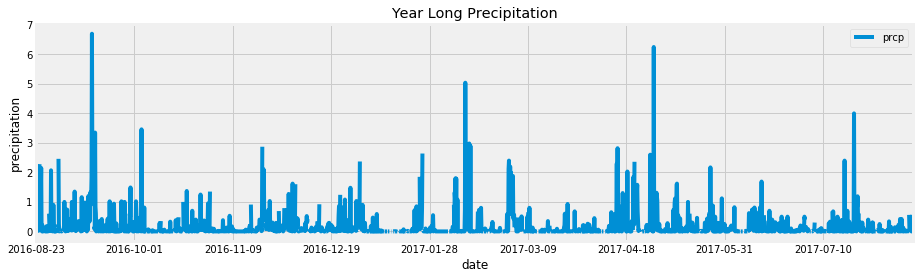

In [9]:
# Use Pandas Plotting with Matplotlib to plot the data

fig, ax = plt.subplots(figsize = (14, 4))
results_df.plot(ax = ax, x_compat = True)

# Lables 
ax.set_xlabel('date')
ax.set_ylabel('precipitation')
ax.set_title("Year Long Precipitation")
plt.show()


In [10]:
# Use Pandas to calcualte the summary statistics for the precipitation data
results_df.describe()


prcp
count  2021.000000
mean      0.177279
std       0.461190
min       0.000000
25%       0.000000
50%       0.020000
75%       0.130000
max       6.700000

In [11]:
# Design a query to show how many stations are available in this dataset?
station_count = session.query(stations).count()
station_count


9

In [12]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
most_active_stations = (session.query(measurement.station,func.count(measurement.station))\
                       .group_by(measurement.station)\
                       .order_by(func.count(measurement.station).desc())\
                       .all())
most_active_stations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [13]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

# Grab first station under previous query as this is the most active station
top_active_station = most_active_stations[0][0]

# Create query to find the station's min, max, and avg
top_active_station_info = session.query(func.max(measurement.tobs), func.min(measurement.tobs),func.avg(measurement.tobs))\
.filter(measurement.station == top_active_station)\
.order_by(measurement.tobs.desc())\
.all()

# Assign variable to each query result 
top_active_station_max_temp = top_active_station_info[0][0]
top_active_station_min_temp = top_active_station_info[0][1]
top_active_station_avg_temp = top_active_station_info[0][2]

# Print 
print(f' Highest temp: {top_active_station_max_temp}')
print(f' Lowest temp: {top_active_station_min_temp}')
print(f' Average temp: {top_active_station_avg_temp}')


 Highest temp: 85.0
 Lowest temp: 54.0
 Average temp: 71.66378066378067


In [14]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperature_observations = session.query(measurement.date,measurement.tobs)\
.filter(measurement.station == top_active_station)\
.filter(measurement.date >= last_date_minus365)\
.order_by(measurement.date.desc())\
.all()
temperature_observations

[('2017-08-18', 79.0),
 ('2017-08-17', 76.0),
 ('2017-08-16', 76.0),
 ('2017-08-15', 77.0),
 ('2017-08-14', 77.0),
 ('2017-08-13', 77.0),
 ('2017-08-06', 83.0),
 ('2017-08-05', 82.0),
 ('2017-08-04', 77.0),
 ('2017-07-31', 76.0),
 ('2017-07-30', 81.0),
 ('2017-07-29', 82.0),
 ('2017-07-28', 81.0),
 ('2017-07-27', 76.0),
 ('2017-07-26', 75.0),
 ('2017-07-25', 77.0),
 ('2017-07-24', 75.0),
 ('2017-07-23', 82.0),
 ('2017-07-22', 77.0),
 ('2017-07-21', 77.0),
 ('2017-07-20', 77.0),
 ('2017-07-19', 76.0),
 ('2017-07-18', 76.0),
 ('2017-07-17', 76.0),
 ('2017-07-16', 80.0),
 ('2017-07-15', 80.0),
 ('2017-07-14', 76.0),
 ('2017-07-13', 74.0),
 ('2017-07-12', 74.0),
 ('2017-07-11', 72.0),
 ('2017-07-10', 69.0),
 ('2017-07-09', 78.0),
 ('2017-07-08', 78.0),
 ('2017-07-07', 75.0),
 ('2017-07-06', 74.0),
 ('2017-07-05', 77.0),
 ('2017-07-04', 78.0),
 ('2017-07-03', 76.0),
 ('2017-07-02', 81.0),
 ('2017-07-01', 79.0),
 ('2017-06-30', 76.0),
 ('2017-06-29', 76.0),
 ('2017-06-28', 77.0),
 ('2017-06-

In [15]:
# Create DF based on query results 
temperature_observations_df = pd.DataFrame(temperature_observations, columns = ['Date', 'Temperature'])
temperature_observations_df


Date  Temperature
0    2017-08-18         79.0
1    2017-08-17         76.0
2    2017-08-16         76.0
3    2017-08-15         77.0
4    2017-08-14         77.0
..          ...          ...
347  2016-08-27         75.0
348  2016-08-26         80.0
349  2016-08-25         80.0
350  2016-08-24         77.0
351  2016-08-23         77.0

[352 rows x 2 columns]

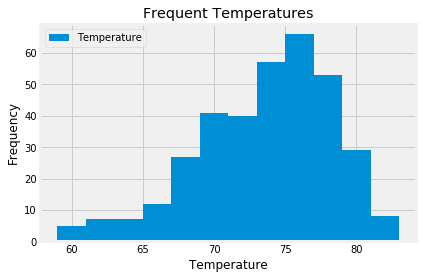

In [16]:
# Plot DF as a histogram
fig, ax = plt.subplots(figsize = (6, 4))
temperature_observations_df.plot.hist(bins = 12, ax = ax)

# Lables 
ax.set_ylabel('Frequency')
ax.set_xlabel('Temperature')
ax.set_title("Frequent Temperatures")
plt.show()


## Bonus Challenge Assignment